# Fashion MNIST Loading and Visualization

## import libraries

In [1]:
import torch
import torchvision

# data loading and transforming
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt


## loading data

In [11]:
# transform to read the data in as a tensor
data_transform = transforms.ToTensor()

# choose training and test datasets
train_data = FashionMNIST(root = "./data", train = True,
                          download = True, transform= data_transform)

print("number of traing images= ", len(train_data))

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 309kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.48MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.41MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

number of traing images=  60000


## data iteration and batching

In [12]:
batch_size = 40
train_loader = DataLoader(train_data, batch_size= batch_size, shuffle= True)

# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

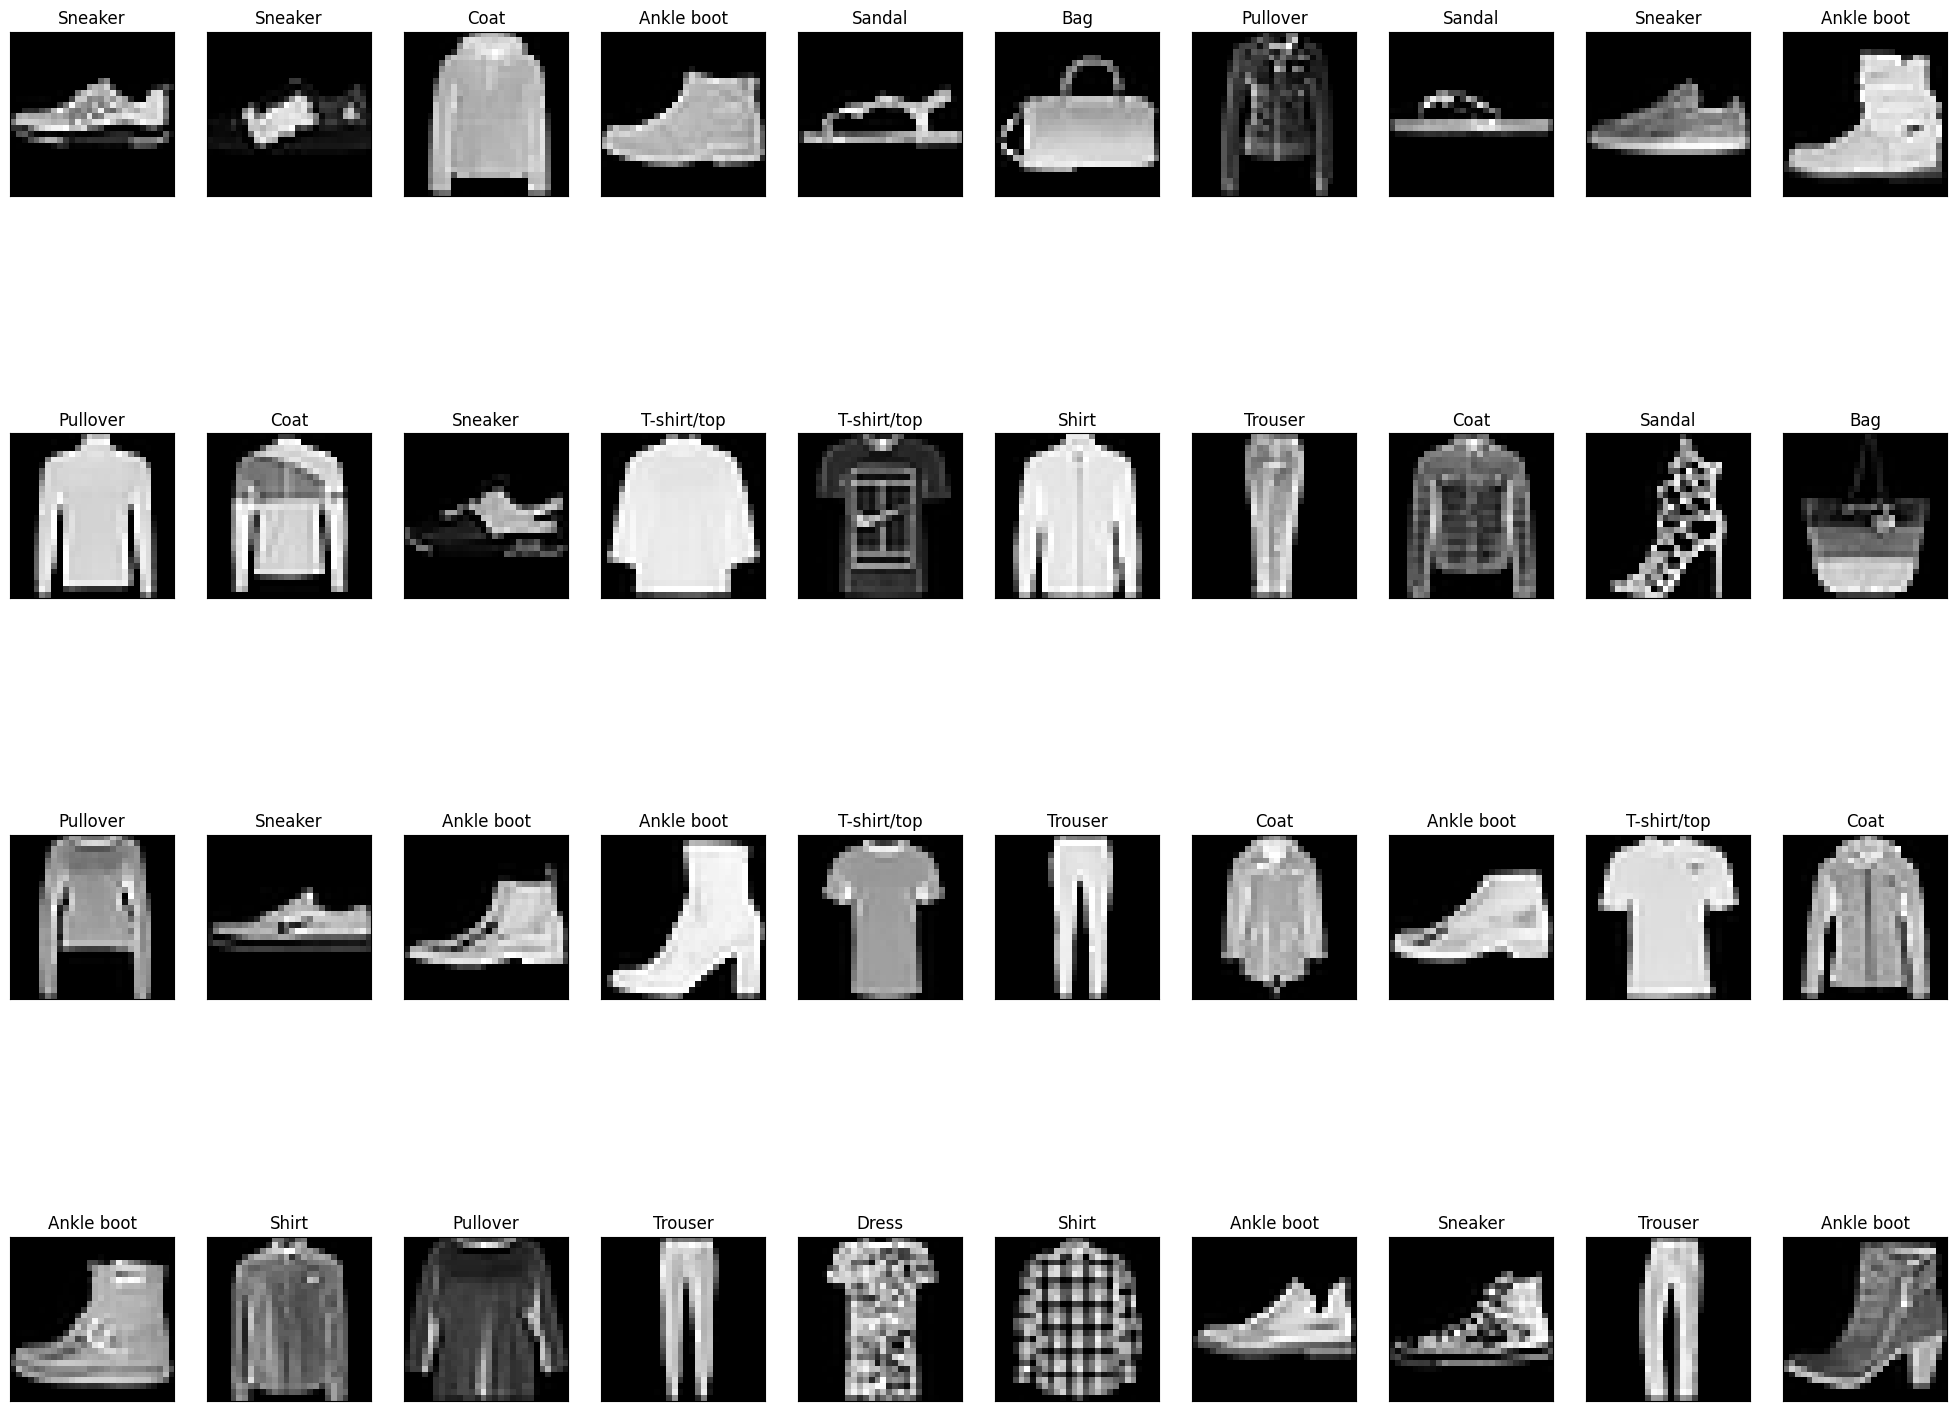

In [27]:
data_iter = iter(train_loader)
images , labels = data_iter._next_data()
images = images.numpy()

fig = plt.figure(figsize = (25,20))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(4, batch_size//4, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]) , cmap = "gray")
    ax.set_title(classes[labels[idx]])

In [33]:
images[2]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.0627451 , 0.41960785, 0.5882353 , 0.7058824 , 0.7254902 ,
         0.73333335, 0.67058825, 0.52156866, 0.3254902 , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.00392157, 0.        , 0.17254902,
         0.83137256, 0.8901961 , 0.85882354, 0.8117647 , 0.827451  ,
         0.7882353 , 0.83137256, 0.8352941 , 0.88235295, 0.74509805,
         0.01568628, 0.        , 0.00784314, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.00392157, 0.        , 0.        , 0.54901963,
         0.85490197, 0.8       , 0.8666667 , 0.8862745 , 0.8352941 ,
         0.

## normalized image show

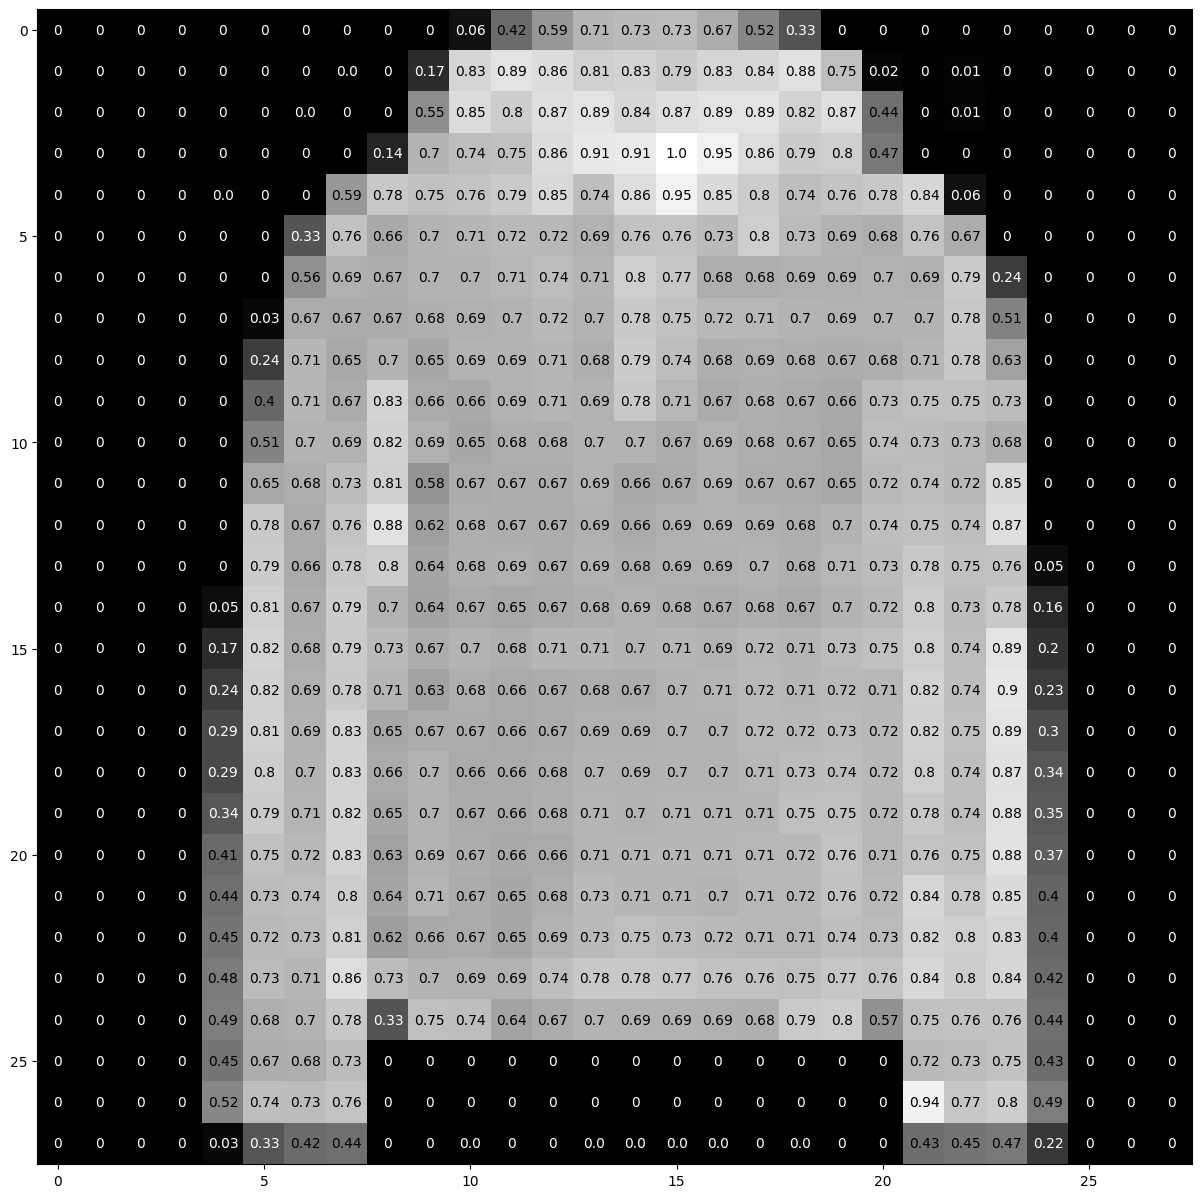

In [32]:
# select image
idx = 2

img = np.squeeze(images[idx])
fig = plt.figure(figsize= (15,15))
ax = fig.add_subplot(111)
ax.imshow(img, cmap="gray")
width, height= img.shape
thresh = img.max()/2.55

for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy= (y,x),
         horizontalalignment= "center",
         verticalalignment= "center",
         color= "white" if img[x][y] < thresh else "black")